# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras` (that is in fact embedded inside a larger library called `tensorflow`, but we will not discuss `tensorflow` in this course).
You should visit [`keras` webpage](https://www.tensorflow.org/guide/keras/overview) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

**1. Define layers, and add them one by one to the model**


In [ ]:
input_layer = InputLayer(input_shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [ ]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist, boston_housing
from tensorflow.keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

In [4]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [5]:
x_train, x_test, y_train, y_test = prepare_boston()

In [6]:
print(x_train.shape, y_train.shape)
print(y_train[:10])

(404, 13) (404, 1)
[[0.22666667]
 [0.82888889]
 [1.        ]
 [0.35777778]
 [0.28222222]
 [0.3       ]
 [0.14      ]
 [0.23555556]
 [0.23555556]
 [0.20888889]]


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [8]:
input_layer = InputLayer(input_shape=(13,))
output_layer = Dense(units=1, activation="linear")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
5/5 - 1s - loss: 2.6639
Epoch 2/10
5/5 - 0s - loss: 1.2369
Epoch 3/10
5/5 - 0s - loss: 0.5935
Epoch 4/10
5/5 - 0s - loss: 0.2994
Epoch 5/10
5/5 - 0s - loss: 0.1611
Epoch 6/10
5/5 - 0s - loss: 0.0971
Epoch 7/10
5/5 - 0s - loss: 0.0675
Epoch 8/10
5/5 - 0s - loss: 0.0552
Epoch 9/10
5/5 - 0s - loss: 0.0468
Epoch 10/10
5/5 - 0s - loss: 0.0424


**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [20]:
import tensorflow as tf

tf.random.set_seed(0)

x_train, x_test, y_train, y_test = prepare_mnist()

input_layer = InputLayer(input_shape=x_train.shape[1:])
output_layer = Dense(units=y_train.shape[1], activation="softmax")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 4s - loss: 0.6244 - accuracy: 0.8411
Epoch 2/10
600/600 - 2s - loss: 0.3465 - accuracy: 0.9054
Epoch 3/10
600/600 - 2s - loss: 0.3097 - accuracy: 0.9144
Epoch 4/10
600/600 - 2s - loss: 0.2925 - accuracy: 0.9183
Epoch 5/10
600/600 - 2s - loss: 0.2824 - accuracy: 0.9214
Epoch 6/10
600/600 - 2s - loss: 0.2751 - accuracy: 0.9232
Epoch 7/10
600/600 - 2s - loss: 0.2697 - accuracy: 0.9249
Epoch 8/10
600/600 - 2s - loss: 0.2656 - accuracy: 0.9264
Epoch 9/10
600/600 - 3s - loss: 0.2622 - accuracy: 0.9271
Epoch 10/10
600/600 - 3s - loss: 0.2591 - accuracy: 0.9286


**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [21]:
tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 4s - loss: 0.3323 - accuracy: 0.9089
Epoch 2/10
600/600 - 3s - loss: 0.1515 - accuracy: 0.9563
Epoch 3/10
600/600 - 3s - loss: 0.1058 - accuracy: 0.9697
Epoch 4/10
600/600 - 3s - loss: 0.0815 - accuracy: 0.9760
Epoch 5/10
600/600 - 3s - loss: 0.0650 - accuracy: 0.9810
Epoch 6/10
600/600 - 3s - loss: 0.0526 - accuracy: 0.9844
Epoch 7/10
600/600 - 3s - loss: 0.0438 - accuracy: 0.9873
Epoch 8/10
600/600 - 3s - loss: 0.0359 - accuracy: 0.9899
Epoch 9/10
600/600 - 3s - loss: 0.0296 - accuracy: 0.9917
Epoch 10/10
600/600 - 3s - loss: 0.0248 - accuracy: 0.9935


In [22]:
tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - loss: 0.2942 - accuracy: 0.9180
Epoch 2/10
600/600 - 3s - loss: 0.1161 - accuracy: 0.9655
Epoch 3/10
600/600 - 3s - loss: 0.0779 - accuracy: 0.9761
Epoch 4/10
600/600 - 3s - loss: 0.0581 - accuracy: 0.9819
Epoch 5/10
600/600 - 3s - loss: 0.0455 - accuracy: 0.9862
Epoch 6/10
600/600 - 3s - loss: 0.0349 - accuracy: 0.9893
Epoch 7/10
600/600 - 3s - loss: 0.0291 - accuracy: 0.9908
Epoch 8/10
600/600 - 3s - loss: 0.0256 - accuracy: 0.9920
Epoch 9/10
600/600 - 3s - loss: 0.0193 - accuracy: 0.9938
Epoch 10/10
600/600 - 4s - loss: 0.0173 - accuracy: 0.9944


In [23]:
tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 7s - loss: 0.2870 - accuracy: 0.9174
Epoch 2/10
600/600 - 4s - loss: 0.1086 - accuracy: 0.9673
Epoch 3/10
600/600 - 3s - loss: 0.0742 - accuracy: 0.9769
Epoch 4/10
600/600 - 3s - loss: 0.0562 - accuracy: 0.9826
Epoch 5/10
600/600 - 3s - loss: 0.0449 - accuracy: 0.9856
Epoch 6/10
600/600 - 3s - loss: 0.0347 - accuracy: 0.9891
Epoch 7/10
600/600 - 3s - loss: 0.0299 - accuracy: 0.9903
Epoch 8/10
600/600 - 3s - loss: 0.0270 - accuracy: 0.9910
Epoch 9/10
600/600 - 3s - loss: 0.0234 - accuracy: 0.9920
Epoch 10/10
600/600 - 4s - loss: 0.0190 - accuracy: 0.9938


In [24]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [28]:
units = 134794 / 794

tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

134365
Epoch 1/10
600/600 - 7s - loss: 0.3106 - accuracy: 0.9132
Epoch 2/10
600/600 - 3s - loss: 0.1385 - accuracy: 0.9604
Epoch 3/10
600/600 - 3s - loss: 0.0960 - accuracy: 0.9725
Epoch 4/10
600/600 - 3s - loss: 0.0728 - accuracy: 0.9785
Epoch 5/10
600/600 - 3s - loss: 0.0579 - accuracy: 0.9827
Epoch 6/10
600/600 - 3s - loss: 0.0460 - accuracy: 0.9869
Epoch 7/10
600/600 - 3s - loss: 0.0371 - accuracy: 0.9893
Epoch 8/10
600/600 - 3s - loss: 0.0304 - accuracy: 0.9919
Epoch 9/10
600/600 - 5s - loss: 0.0247 - accuracy: 0.9934
Epoch 10/10
600/600 - 5s - loss: 0.0204 - accuracy: 0.9948


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://www.tensorflow.org/guide/keras/train_and_evaluate#automatically_setting_apart_a_validation_holdout_set) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [29]:
tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

Epoch 1/10
480/480 - 10s - loss: 0.3272 - accuracy: 0.9024 - val_loss: 0.1601 - val_accuracy: 0.9523
Epoch 2/10
480/480 - 4s - loss: 0.1213 - accuracy: 0.9640 - val_loss: 0.1350 - val_accuracy: 0.9610
Epoch 3/10
480/480 - 4s - loss: 0.0819 - accuracy: 0.9751 - val_loss: 0.1019 - val_accuracy: 0.9685
Epoch 4/10
480/480 - 3s - loss: 0.0612 - accuracy: 0.9804 - val_loss: 0.1052 - val_accuracy: 0.9691
Epoch 5/10
480/480 - 3s - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0936 - val_accuracy: 0.9722
Epoch 6/10
480/480 - 5s - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0978 - val_accuracy: 0.9724
Epoch 7/10
480/480 - 4s - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0879 - val_accuracy: 0.9752
Epoch 8/10
480/480 - 4s - loss: 0.0289 - accuracy: 0.9903 - val_loss: 0.0975 - val_accuracy: 0.9734
Epoch 9/10
480/480 - 4s - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.1185 - val_accuracy: 0.9712
Epoch 10/10
480/480 - 4s - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.1296 - val_accuracy: 0.971

In [30]:
units = 134794 / 794

tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

134365
Epoch 1/10
480/480 - 9s - loss: 0.3477 - accuracy: 0.9029 - val_loss: 0.1824 - val_accuracy: 0.9492
Epoch 2/10
480/480 - 3s - loss: 0.1566 - accuracy: 0.9552 - val_loss: 0.1432 - val_accuracy: 0.9580
Epoch 3/10
480/480 - 3s - loss: 0.1083 - accuracy: 0.9689 - val_loss: 0.1147 - val_accuracy: 0.9658
Epoch 4/10
480/480 - 3s - loss: 0.0838 - accuracy: 0.9754 - val_loss: 0.0993 - val_accuracy: 0.9697
Epoch 5/10
480/480 - 3s - loss: 0.0666 - accuracy: 0.9807 - val_loss: 0.0996 - val_accuracy: 0.9704
Epoch 6/10
480/480 - 3s - loss: 0.0533 - accuracy: 0.9846 - val_loss: 0.0931 - val_accuracy: 0.9724
Epoch 7/10
480/480 - 3s - loss: 0.0423 - accuracy: 0.9887 - val_loss: 0.0834 - val_accuracy: 0.9755
Epoch 8/10
480/480 - 3s - loss: 0.0355 - accuracy: 0.9900 - val_loss: 0.0874 - val_accuracy: 0.9745
Epoch 9/10
480/480 - 5s - loss: 0.0290 - accuracy: 0.9923 - val_loss: 0.0858 - val_accuracy: 0.9747
Epoch 10/10
480/480 - 3s - loss: 0.0238 - accuracy: 0.9942 - val_loss: 0.0810 - val_accuracy:

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [31]:
tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 10s - loss: 0.3514 - accuracy: 0.9013 - val_loss: 0.1840 - val_accuracy: 0.9461
Epoch 2/10
420/420 - 3s - loss: 0.1388 - accuracy: 0.9584 - val_loss: 0.1354 - val_accuracy: 0.9611
Epoch 3/10
420/420 - 3s - loss: 0.0941 - accuracy: 0.9714 - val_loss: 0.1172 - val_accuracy: 0.9666
Epoch 4/10
420/420 - 3s - loss: 0.0685 - accuracy: 0.9784 - val_loss: 0.1238 - val_accuracy: 0.9623
Epoch 5/10
420/420 - 3s - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.1165 - val_accuracy: 0.9663
Epoch 6/10
420/420 - 3s - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.1056 - val_accuracy: 0.9706
Epoch 7/10
420/420 - 4s - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.1035 - val_accuracy: 0.9713
Epoch 8/10
420/420 - 3s - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.1139 - val_accuracy: 0.9698
Epoch 9/10
420/420 - 3s - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.1181 - val_accuracy: 0.9707
Epoch 10/10
420/420 - 3s - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.1178 - val_accuracy: 0.970

In [32]:
tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 6s - loss: 1.4240 - accuracy: 0.6456 - val_loss: 0.6962 - val_accuracy: 0.8420
Epoch 2/10
420/420 - 3s - loss: 0.5469 - accuracy: 0.8607 - val_loss: 0.4354 - val_accuracy: 0.8823
Epoch 3/10
420/420 - 3s - loss: 0.4091 - accuracy: 0.8889 - val_loss: 0.3686 - val_accuracy: 0.8964
Epoch 4/10
420/420 - 4s - loss: 0.3572 - accuracy: 0.9003 - val_loss: 0.3324 - val_accuracy: 0.9057
Epoch 5/10
420/420 - 4s - loss: 0.3271 - accuracy: 0.9077 - val_loss: 0.3112 - val_accuracy: 0.9107
Epoch 6/10
420/420 - 3s - loss: 0.3054 - accuracy: 0.9134 - val_loss: 0.2961 - val_accuracy: 0.9140
Epoch 7/10
420/420 - 3s - loss: 0.2884 - accuracy: 0.9181 - val_loss: 0.2814 - val_accuracy: 0.9199
Epoch 8/10
420/420 - 3s - loss: 0.2739 - accuracy: 0.9216 - val_loss: 0.2704 - val_accuracy: 0.9214
Epoch 9/10
420/420 - 3s - loss: 0.2617 - accuracy: 0.9247 - val_loss: 0.2601 - val_accuracy: 0.9248
Epoch 10/10
420/420 - 3s - loss: 0.2504 - accuracy: 0.9283 - val_loss: 0.2512 - val_accuracy: 0.9288

In [36]:
tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 9s - loss: 0.3514 - accuracy: 0.9013 - val_loss: 0.1840 - val_accuracy: 0.9461
Epoch 2/10
420/420 - 4s - loss: 0.1388 - accuracy: 0.9584 - val_loss: 0.1354 - val_accuracy: 0.9611
Epoch 3/10
420/420 - 3s - loss: 0.0941 - accuracy: 0.9714 - val_loss: 0.1172 - val_accuracy: 0.9666
Epoch 4/10
420/420 - 3s - loss: 0.0685 - accuracy: 0.9784 - val_loss: 0.1238 - val_accuracy: 0.9623
Epoch 5/10
420/420 - 3s - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.1165 - val_accuracy: 0.9663
Epoch 6/10
420/420 - 3s - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.1056 - val_accuracy: 0.9706
Epoch 7/10
420/420 - 3s - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.1035 - val_accuracy: 0.9713
Epoch 8/10
420/420 - 4s - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.1139 - val_accuracy: 0.9698
Epoch 9/10
420/420 - 4s - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.1181 - val_accuracy: 0.9707
Epoch 10/10
420/420 - 4s - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.1178 - val_accuracy: 0.9709

**Question #8.** Using [the docs](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

In [37]:
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 8s - loss: 1.0116 - accuracy: 0.7509 - val_loss: 0.4178 - val_accuracy: 0.8899
Epoch 2/10
420/420 - 3s - loss: 0.3541 - accuracy: 0.9054 - val_loss: 0.3031 - val_accuracy: 0.9150
Epoch 3/10
420/420 - 4s - loss: 0.2791 - accuracy: 0.9216 - val_loss: 0.2615 - val_accuracy: 0.9246
Epoch 4/10
420/420 - 3s - loss: 0.2389 - accuracy: 0.9320 - val_loss: 0.2305 - val_accuracy: 0.9369
Epoch 5/10
420/420 - 3s - loss: 0.2103 - accuracy: 0.9403 - val_loss: 0.2100 - val_accuracy: 0.9410
Epoch 6/10
420/420 - 3s - loss: 0.1882 - accuracy: 0.9473 - val_loss: 0.1965 - val_accuracy: 0.9443
Epoch 7/10
420/420 - 3s - loss: 0.1706 - accuracy: 0.9524 - val_loss: 0.1815 - val_accuracy: 0.9481
Epoch 8/10
420/420 - 3s - loss: 0.1560 - accuracy: 0.9553 - val_loss: 0.1716 - val_accuracy: 0.9517
Epoch 9/10
420/420 - 3s - loss: 0.1437 - accuracy: 0.9595 - val_loss: 0.1616 - val_accuracy: 0.9546
Epoch 10/10
420/420 - 4s - loss: 0.1336 - accuracy: 0.9621 - val_loss: 0.1567 - val_accuracy: 0.9551

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

In [38]:
tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 7s - loss: 0.3514 - accuracy: 0.9013 - val_loss: 0.1840 - val_accuracy: 0.9461
Epoch 2/10
420/420 - 4s - loss: 0.1388 - accuracy: 0.9584 - val_loss: 0.1354 - val_accuracy: 0.9611
Epoch 3/10
420/420 - 4s - loss: 0.0941 - accuracy: 0.9714 - val_loss: 0.1172 - val_accuracy: 0.9666
Epoch 4/10
420/420 - 3s - loss: 0.0685 - accuracy: 0.9784 - val_loss: 0.1238 - val_accuracy: 0.9623
Epoch 5/10
420/420 - 3s - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.1165 - val_accuracy: 0.9663
Epoch 6/10
420/420 - 4s - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.1056 - val_accuracy: 0.9706
Epoch 7/10
420/420 - 4s - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.1035 - val_accuracy: 0.9713
Epoch 8/10
420/420 - 3s - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.1139 - val_accuracy: 0.9698
Epoch 9/10
420/420 - 3s - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.1181 - val_accuracy: 0.9707
Epoch 10/10
420/420 - 3s - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.1178 - val_accuracy: 0.9709

In [40]:
h.history

{'loss': [0.3513571619987488,
  0.1388404220342636,
  0.09409261494874954,
  0.06851764023303986,
  0.05255904793739319,
  0.04040331020951271,
  0.029622837901115417,
  0.025195669382810593,
  0.01955149509012699,
  0.017068171873688698],
 'accuracy': [0.9013333320617676,
  0.9584285616874695,
  0.9714285731315613,
  0.9783809781074524,
  0.9835476279258728,
  0.9873809814453125,
  0.9908333420753479,
  0.9922857284545898,
  0.9940237998962402,
  0.994690477848053],
 'val_loss': [0.18397927284240723,
  0.13543133437633514,
  0.11717640608549118,
  0.12379680573940277,
  0.11652684211730957,
  0.10558784008026123,
  0.10346890240907669,
  0.11387269198894501,
  0.11811681091785431,
  0.11782754212617874],
 'val_accuracy': [0.9461110830307007,
  0.9610555768013,
  0.9665555357933044,
  0.9623333215713501,
  0.9663333296775818,
  0.9706110954284668,
  0.9713333249092102,
  0.9698333144187927,
  0.9706666469573975,
  0.9709444642066956]}

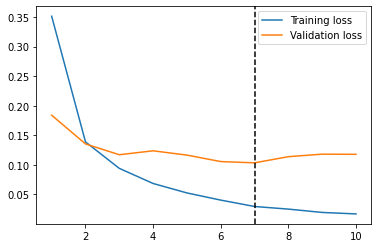

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, 11), h.history["loss"], label="Training loss")
plt.plot(np.arange(1, 11), h.history["val_loss"], label="Validation loss")
plt.axvline(x=np.argmin(h.history["val_loss"]) + 1, color='k', linestyle='--')
plt.legend();

Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.hdf5` on your Deepnote project. Only record models if validation loss is lower than for all previous models.

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint

cb = ModelCheckpoint("model.hdf5", save_best_only=True)

tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/10
600/600 - 9s - loss: 0.2942 - accuracy: 0.9180 - val_loss: 0.1464 - val_accuracy: 0.9548
Epoch 2/10
600/600 - 4s - loss: 0.1161 - accuracy: 0.9655 - val_loss: 0.1032 - val_accuracy: 0.9676
Epoch 3/10
600/600 - 4s - loss: 0.0779 - accuracy: 0.9761 - val_loss: 0.0819 - val_accuracy: 0.9732
Epoch 4/10
600/600 - 4s - loss: 0.0581 - accuracy: 0.9819 - val_loss: 0.0818 - val_accuracy: 0.9737
Epoch 5/10
600/600 - 4s - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0727 - val_accuracy: 0.9773
Epoch 6/10
600/600 - 4s - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0733 - val_accuracy: 0.9765
Epoch 7/10
600/600 - 4s - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0735 - val_accuracy: 0.9778
Epoch 8/10
600/600 - 4s - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0804 - val_accuracy: 0.9769
Epoch 9/10
600/600 - 3s - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0820 - val_accuracy: 0.9765
Epoch 10/10
600/600 - 4s - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0844 - val_accuracy: 0.9773

Use the code below to check that a model has been saved:

In [49]:
!ls -alh "model.hdf5"

-rw-r--r--  1 tavenard_r  staff   1.4M Feb  8 16:39 model.hdf5


In [51]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 11ms/step - loss: 0.0844 - accuracy: 0.9773


[0.08437619358301163, 0.9772999882698059]

In [52]:
model.load_weights("model.hdf5")
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0727 - accuracy: 0.9773: 0s - loss: 0.0731 - accura


[0.07268590480089188, 0.9772999882698059]

## Regularization

**Question #11.** Add an $\ell_2$ regularization to the weights of your model and show its impact on overfitting. [These docs](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers) could help.

In [53]:
from tensorflow.keras.regularizers import l2

tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=y_train.shape[1], activation="softmax", kernel_regularizer=l2(.001))
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10
480/480 - 12s - loss: 0.5847 - accuracy: 0.9015 - val_loss: 0.3803 - val_accuracy: 0.9492
Epoch 2/10
480/480 - 4s - loss: 0.3450 - accuracy: 0.9528 - val_loss: 0.3195 - val_accuracy: 0.9577
Epoch 3/10
480/480 - 3s - loss: 0.2869 - accuracy: 0.9641 - val_loss: 0.2756 - val_accuracy: 0.9653
Epoch 4/10
480/480 - 4s - loss: 0.2599 - accuracy: 0.9678 - val_loss: 0.2585 - val_accuracy: 0.9661
Epoch 5/10
480/480 - 4s - loss: 0.2445 - accuracy: 0.9703 - val_loss: 0.2525 - val_accuracy: 0.9667
Epoch 6/10
480/480 - 4s - loss: 0.2341 - accuracy: 0.9733 - val_loss: 0.2411 - val_accuracy: 0.9684
Epoch 7/10
480/480 - 3s - loss: 0.2284 - accuracy: 0.9736 - val_loss: 0.2377 - val_accuracy: 0.9702
Epoch 8/10
480/480 - 3s - loss: 0.2206 - accuracy: 0.9761 - val_loss: 0.2328 - val_accuracy: 0.9699
Epoch 9/10
480/480 - 4s - loss: 0.2198 - accuracy: 0.9758 - val_loss: 0.2407 - val_accuracy: 0.9669
Epoch 10/10
480/480 - 3s - loss: 0.2161 - accuracy: 0.9776 - val_loss: 0.2263 - val_accuracy: 0.972

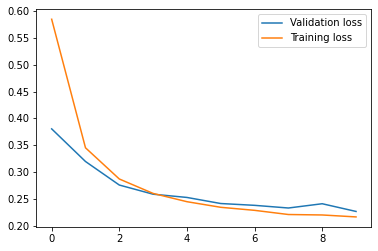

In [55]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question #12.** Instead of the $\ell_2$ regularization, set up a [drop-out](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) strategy and assess its impact on overfitting (you will turn off 10% of the neurons at each training batch).

In [56]:
from tensorflow.keras.layers import Dropout

tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10
480/480 - 5s - loss: 0.4029 - accuracy: 0.8810 - val_loss: 0.1549 - val_accuracy: 0.9542
Epoch 2/10
480/480 - 4s - loss: 0.1698 - accuracy: 0.9491 - val_loss: 0.1195 - val_accuracy: 0.9643
Epoch 3/10
480/480 - 5s - loss: 0.1281 - accuracy: 0.9600 - val_loss: 0.1022 - val_accuracy: 0.9680
Epoch 4/10
480/480 - 4s - loss: 0.1053 - accuracy: 0.9668 - val_loss: 0.0920 - val_accuracy: 0.9710
Epoch 5/10
480/480 - 3s - loss: 0.0905 - accuracy: 0.9711 - val_loss: 0.0901 - val_accuracy: 0.9716
Epoch 6/10
480/480 - 3s - loss: 0.0767 - accuracy: 0.9753 - val_loss: 0.0807 - val_accuracy: 0.9754
Epoch 7/10
480/480 - 3s - loss: 0.0715 - accuracy: 0.9779 - val_loss: 0.0776 - val_accuracy: 0.9766
Epoch 8/10
480/480 - 3s - loss: 0.0644 - accuracy: 0.9799 - val_loss: 0.0768 - val_accuracy: 0.9768
Epoch 9/10
480/480 - 3s - loss: 0.0586 - accuracy: 0.9811 - val_loss: 0.0818 - val_accuracy: 0.9750
Epoch 10/10
480/480 - 3s - loss: 0.0520 - accuracy: 0.9824 - val_loss: 0.0775 - val_accuracy: 0.9793

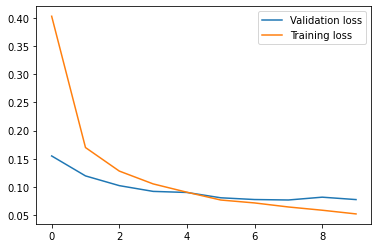

In [57]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question #13.** Set up an [`EarlyStopping`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/100
600/600 - 4s - loss: 0.2942 - accuracy: 0.9180 - val_loss: 0.1464 - val_accuracy: 0.9548
Epoch 2/100
600/600 - 2s - loss: 0.1161 - accuracy: 0.9655 - val_loss: 0.1032 - val_accuracy: 0.9676
Epoch 3/100
600/600 - 3s - loss: 0.0779 - accuracy: 0.9761 - val_loss: 0.0819 - val_accuracy: 0.9732
Epoch 4/100
600/600 - 3s - loss: 0.0581 - accuracy: 0.9819 - val_loss: 0.0818 - val_accuracy: 0.9737
Epoch 5/100
600/600 - 3s - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0727 - val_accuracy: 0.9773
Epoch 6/100
600/600 - 3s - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0733 - val_accuracy: 0.9765
Epoch 7/100
600/600 - 3s - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0735 - val_accuracy: 0.9778
Epoch 8/100
600/600 - 3s - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0804 - val_accuracy: 0.9769


In [59]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0727 - accuracy: 0.9773: 0s - loss: 0.0782 - ac


[0.07268590480089188, 0.9772999882698059]